In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report

In [20]:
data= pd.read_csv("diabetes.csv")

In [39]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
data.shape

(768, 9)

In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


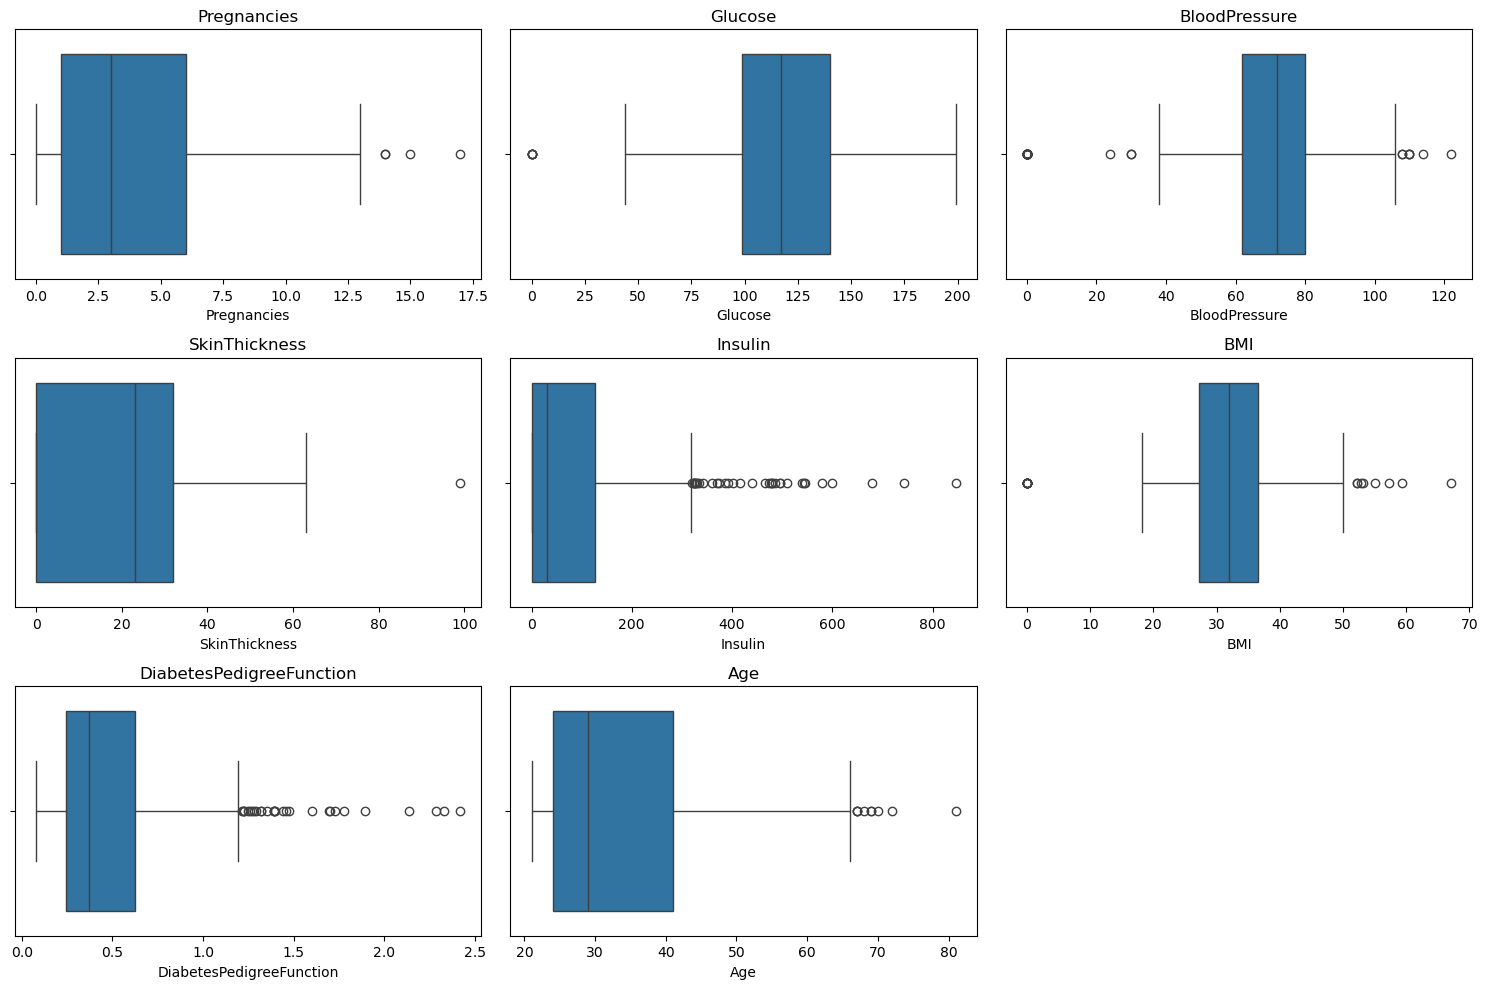

In [25]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [40]:
outlier_col= ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]   #this column contains more 0 values that disturbs the model.

In [41]:
#removing outliers.
for i in outlier_col:
    data[i]=data[i].replace(0,data[i].mean())

In [42]:
x= data.iloc[:,:-1]
y= data["Outcome"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [44]:
ds= DecisionTreeClassifier(max_depth=2)
ds.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
print(ds.score(x_test,y_test)*100,ds.score(x_train,y_train)*100)

74.30894308943088 73.8562091503268


In [46]:
ds.predict([[1	,89.0	,66.0	,23.000000	,94.000000	,28.1,	0.167,	21]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [47]:
for i in range(1,13):  #this is for checking best accuracy.
    ds1 = DecisionTreeClassifier(max_depth=i)
    ds1.fit(x_train,y_train)
    print(ds1.score(x_test,y_test)*100,ds1.score(x_train,y_train)*100,i)

74.30894308943088 73.8562091503268 1
74.30894308943088 73.8562091503268 2
68.61788617886178 77.12418300653596 3
73.98373983739837 83.00653594771242 4
67.64227642276423 89.54248366013073 5
69.26829268292683 92.15686274509804 6
65.3658536585366 97.38562091503267 7
66.5040650406504 98.69281045751634 8
68.29268292682927 99.34640522875817 9
66.01626016260163 100.0 10
68.45528455284553 100.0 11
65.85365853658537 100.0 12


In [48]:
accuracy_score(y_test,ds.predict(x_test))*100

74.30894308943088

In [49]:
print(confusion_matrix(y_test,ds.predict(x_test))*100)

[[34800  5700]
 [10100 10900]]


In [50]:
print("Classification Report",(classification_report(y_test,ds.predict(x_test))))

Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.81       405
           1       0.66      0.52      0.58       210

    accuracy                           0.74       615
   macro avg       0.72      0.69      0.70       615
weighted avg       0.73      0.74      0.73       615



In [52]:
import joblib

In [53]:
joblib.dump(ds, "diabetes_model.pkl")
print("Model saved as diabetes_model.pkl")

Model saved as diabetes_model.pkl
